In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import os
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.random_projection import SparseRandomProjection
from datasketch import MinHash, MinHashLSH


In [3]:
dataset_path = "lab8/tom_and_jerry/tom_and_jerry/tom"
image_paths = [os.path.join(dataset_path, fname).replace('\\', '/') for fname in os.listdir(dataset_path) if fname.endswith('.jpg') or fname.endswith('.png')]
image_paths


['lab8/tom_and_jerry/tom_and_jerry/tom/frame1000.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1001.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1002.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1004.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1005.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1006.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1007.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1008.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1009.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1010.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1011.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1012.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1013.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1014.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1015.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1042.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1048.jpg',
 'lab8/tom_and_jerry/tom_and_jerry/tom/frame1049.jpg',
 'lab8/tom

In [4]:
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
def extract_features(image_path, model):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    features = model.predict(image)
    return features.flatten()


In [6]:
features = []
for path in image_paths:
    features.append(extract_features(path, base_model))

features = np.array(features)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━

In [7]:
def find_similar_images(query_image_path, features, image_paths, model, top_n=5):
    query_features = extract_features(query_image_path, model)
    similarities = cosine_similarity([query_features], features)[0]
    indices = np.argsort(similarities)[::-1][:top_n]
    
    similar_images = [(image_paths[idx], similarities[idx]) for idx in indices]
    return similar_images


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


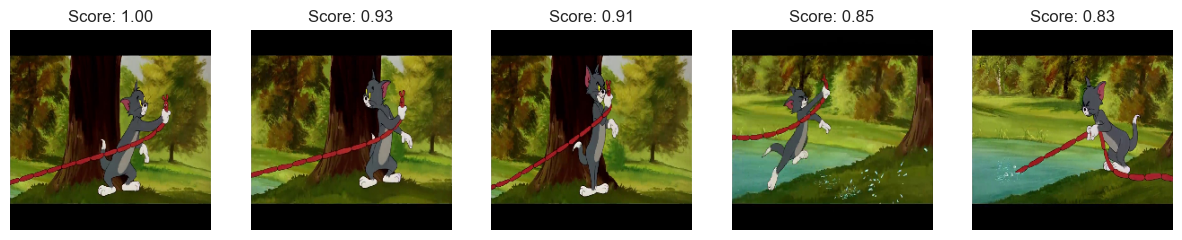

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


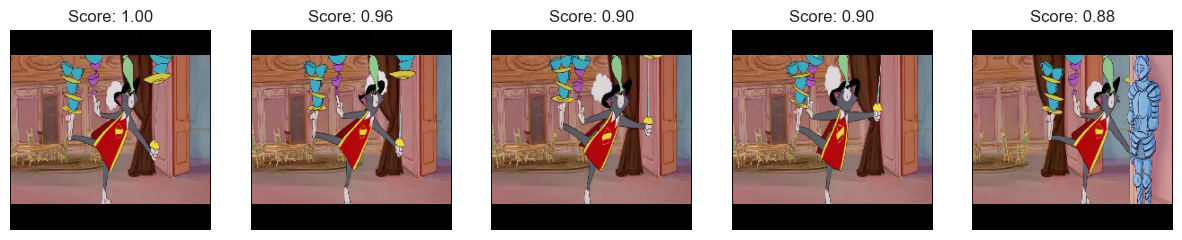

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


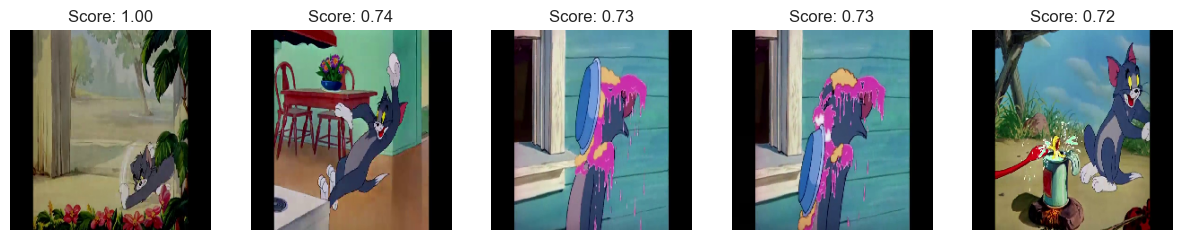

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


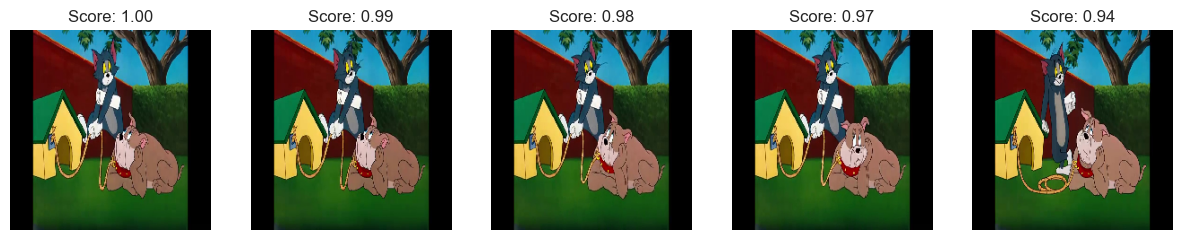

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


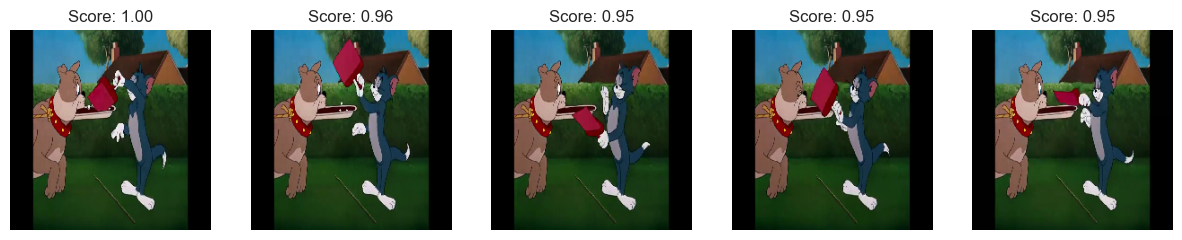

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


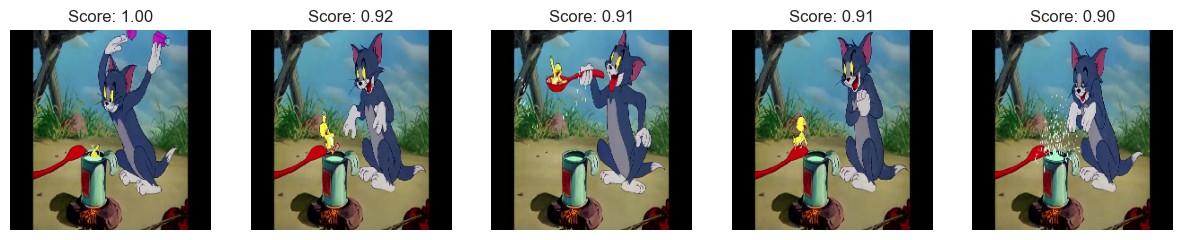

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


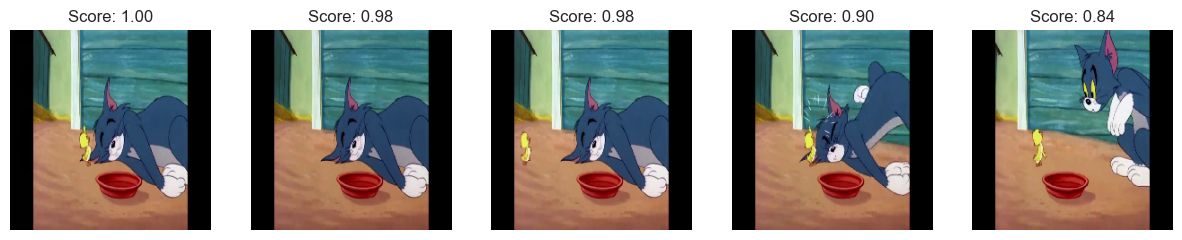

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


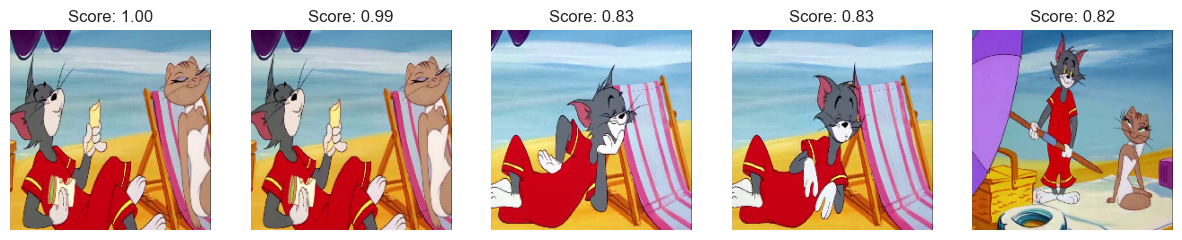

In [15]:
def display_similar_images(similar_images):
    plt.figure(figsize=(15, 5))
    for i, (img_path, score) in enumerate(similar_images):
        plt.subplot(1, len(similar_images), i + 1)
        img = load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.title(f"Score: {score:.2f}")
        plt.axis('off')
    plt.show()

for i in range(1, 1000, 100):
    query_image = image_paths[i]
    similar_images = find_similar_images(query_image, features, image_paths, base_model)
    display_similar_images(similar_images)

In [26]:
from sklearn.neighbors import NearestNeighbors
from sklearn.random_projection import SparseRandomProjection

rp = SparseRandomProjection(n_components=50, random_state=42)  # уменьшаем размерность
reduced_features = rp.fit_transform(features)

In [27]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')
nbrs.fit(reduced_features)

NearestNeighbors(metric='cosine')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


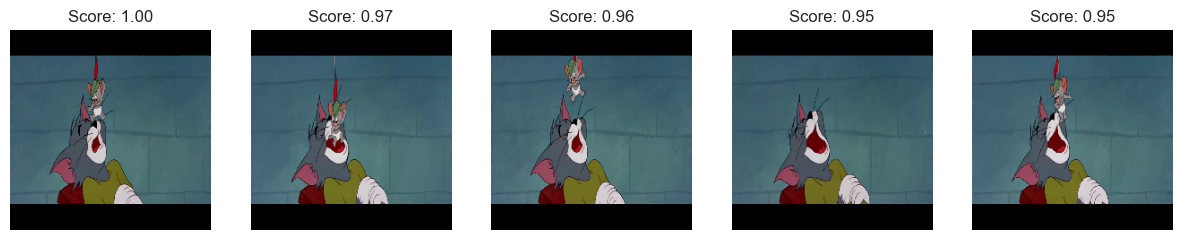

In [30]:
def find_similar_images_lsh(query_image_path, features, image_paths, model, nbrs, rp, top_n=5):
    query_features = extract_features(query_image_path, model).reshape(1, -1)
    reduced_query_features = rp.transform(query_features)

    distances, indices = nbrs.kneighbors(reduced_query_features, n_neighbors=top_n)

    similar_images = [(image_paths[idx], 1 - distances[0][i]) for i, idx in enumerate(indices[0])]
    return similar_images


query_image = image_paths[68]
similar_images = find_similar_images_lsh(query_image, features, image_paths, base_model, nbrs, rp)
display_similar_images(similar_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


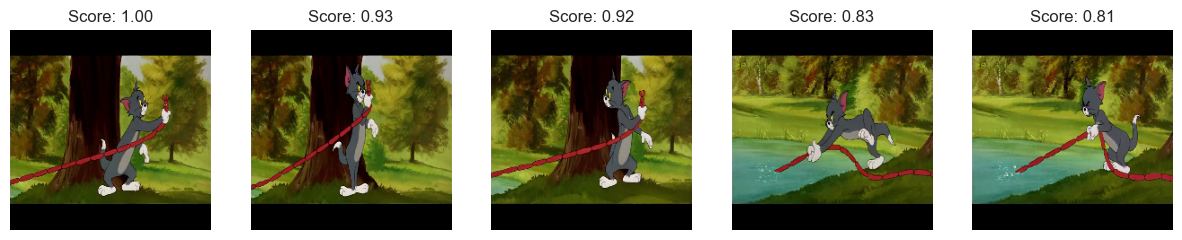

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


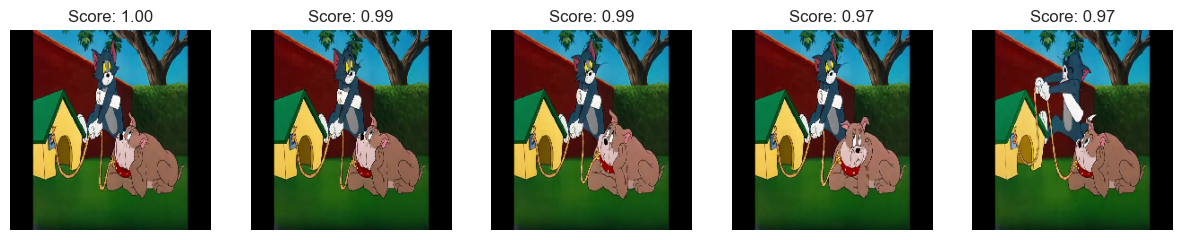

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


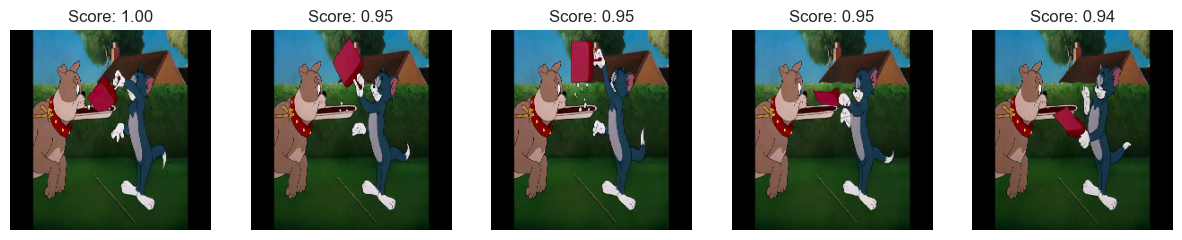

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


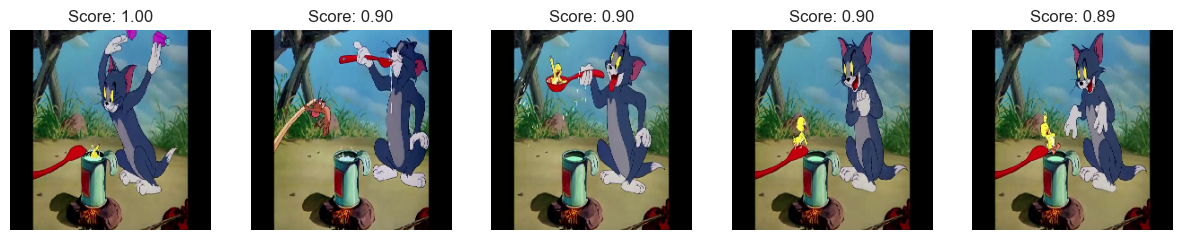

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


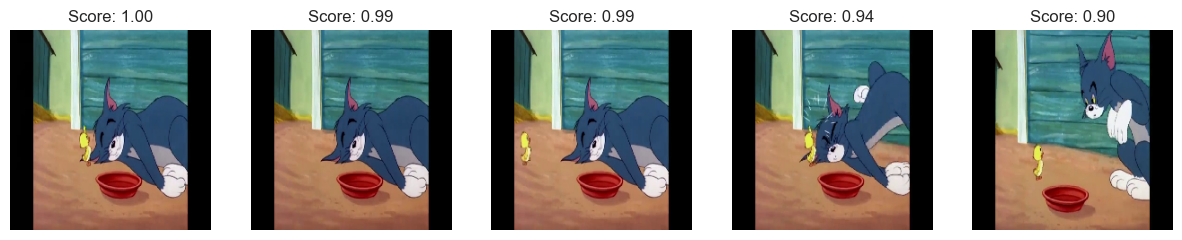

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


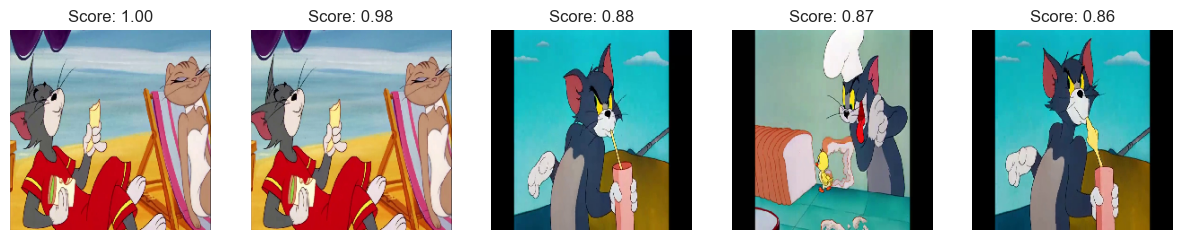

In [31]:
for i in range(1, 1000, 100):
    query_image = image_paths[i]
    similar_images = find_similar_images_lsh(query_image, features, image_paths, base_model, nbrs, rp)
    display_similar_images(similar_images)